[[0.2298057  0.29871797 0.75368315 1.        ]
 [0.33926488 0.45401013 0.88020161 1.        ]
 [0.45897663 0.59612357 0.96405758 1.        ]
 [0.58445061 0.71599826 0.99861968 1.        ]
 [0.70731983 0.80486618 0.98158872 1.        ]
 [0.81765977 0.85547078 0.91498693 1.        ]
 [0.90976009 0.83914061 0.79980233 1.        ]
 [0.96193479 0.75680959 0.66009661 1.        ]
 [0.96440896 0.63744514 0.5170398  1.        ]
 [0.91941787 0.48680872 0.37983557 1.        ]
 [0.83107611 0.3063662  0.25577615 1.        ]
 [0.70567316 0.01555616 0.15023281 1.        ]]
0.3
1.3
[[0.2298057  0.29871797 0.75368315 1.        ]
 [0.33926488 0.45401013 0.88020161 1.        ]
 [0.45897663 0.59612357 0.96405758 1.        ]
 [0.58445061 0.71599826 0.99861968 1.        ]
 [0.70731983 0.80486618 0.98158872 1.        ]
 [0.81765977 0.85547078 0.91498693 1.        ]
 [0.90976009 0.83914061 0.79980233 1.        ]
 [0.96193479 0.75680959 0.66009661 1.        ]
 [0.96440896 0.63744514 0.5170398  1.        ]
 [0.

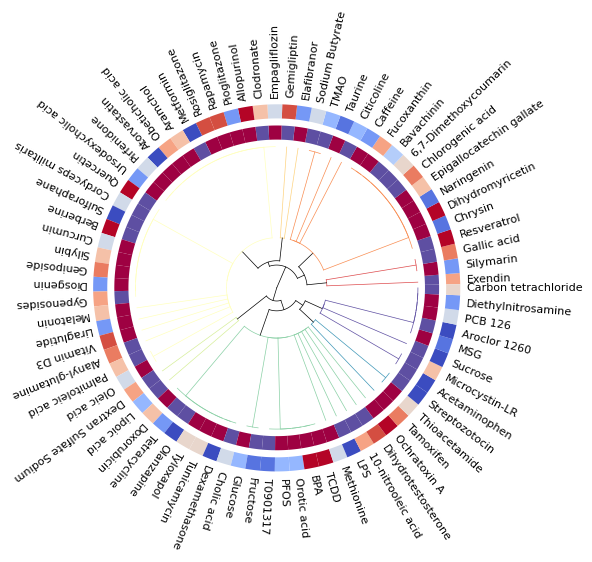

In [78]:
import scipy.cluster.hierarchy as sch
import numpy as np
import radialtree as rt
import matplotlib.pyplot as plt
import pandas as pd

def plot_circular_dendrogram(df, class_col='CLASS', pathway_col='PATHWAY', source_col='SOURCE', chemical_col='CHEMICAL_NAME'):
    # Encode the CLASS, PATHWAY, and Source columns
    df_encoded = pd.get_dummies(df[[class_col, pathway_col, source_col]])
    # Perform hierarchical clustering
    Y = sch.linkage(df_encoded, method="average")
    Z2 = sch.dendrogram(
        Y,
        labels=df[chemical_col].values,
        no_plot=True,
    )
    # Prepare the figure
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect(1)
    
    # Plot the circular dendrogram
    sample_classes = {
        class_col: df[class_col],
    }
    
    # Customize the colors for the classes
    type_num = 12  # Set the number of types (classes)
    type_num2 =  2
    _cmp  = plt.get_cmap("coolwarm", type_num)  # Set up a color map
    print(_cmp(np.linspace(0, 1, type_num)))
    _cmp2 = plt.get_cmap("Spectral", type_num2)  # Set up a second color map
    numleaf = len(df)  # Number of leaves in the dendrogram
    
    colors_dict={"example_color":_cmp(np.random.rand(numleaf)),  # RGB color list. the order of 
                 "example_color2":_cmp2(np.random.rand(numleaf))} # Another RGB color list.
    colors_legends={"example_color":{"colors":_cmp(np.linspace(0, 1, type_num)), 
                                 "labels": ["ex1_"+str(i+1) for i in range(type_num)]},
                "example_color2":{"colors":_cmp2(np.linspace(0, 1, type_num)),
                                  "labels": ["ex2_"+str(i+1) for i in range(type_num)]}}
    
    rt.radialTreee(Z2, ax=ax, pallete= "Spectral", colorlabels=colors_dict, colorlabels_legend=colors_legends)
    plt.tight_layout()
    plt.savefig("dendrogram.png", dpi=500)
    plt.show()

df = pd.read_csv("dataset.csv")
plot_circular_dendrogram(df)

In [30]:
print(df.CLASS.value_counts())
print(df.PATHWAY.value_counts())
print(df.SOURCE.value_counts())

CLASS
Inhibitor    46
Inducer      32
Name: count, dtype: int64
PATHWAY
Lipogenesis         46
Inflammation        22
Fibrosis             5
Oxidative stress     5
Name: count, dtype: int64
SOURCE
Drugs               24
Natural products    23
Chemicals           12
Metabolites          3
Fatty acids          3
Amino acids          3
Sugars               3
Hormones             2
Polysaccharides      2
Peptides             2
Vitamins             1
Name: count, dtype: int64


['#abdda4', '#9e0142', '#d53e4f', '#9e0142', '#9e0142', '#9e0142', '#9e0142', '#f46d43', '#f46d43', '#9e0142', '#9e0142', '#fee08b', '#fee08b', '#fee08b', '#66c2a5', '#f46d43', '#66c2a5', '#f46d43', '#f46d43', '#f46d43', '#f46d43', '#9e0142', '#f46d43', '#ffffbf', '#f46d43', '#f46d43', '#f46d43', '#e6f598', '#e6f598', '#e6f598', '#9e0142', '#9e0142', '#f46d43', '#d53e4f', '#9e0142', '#9e0142', '#ffffbf', '#fdae61', '#5e4fa2', '#d53e4f', '#d53e4f', '#9e0142', '#3288bd', '#9e0142', '#fdae61', '#3288bd', '#9e0142', '#9e0142', '#9e0142', '#d53e4f', '#9e0142', '#d53e4f', '#d53e4f', '#d53e4f', '#d53e4f', '#d53e4f', '#9e0142', '#d53e4f', '#abdda4', '#d53e4f', '#d53e4f', '#d53e4f', '#9e0142', '#d53e4f', '#ffffbf', '#d53e4f', '#d53e4f', '#fdae61', '#d53e4f', '#9e0142', '#d53e4f', '#d53e4f', '#d53e4f', '#d53e4f', '#9e0142', '#9e0142', '#d53e4f', '#9e0142']
0.3
1.3
['#FF6347', '#4682B4']
['#9e0142', '#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#ffffbf', '#e6f598', '#abdda4', '#66c2a5', '#3288bd',

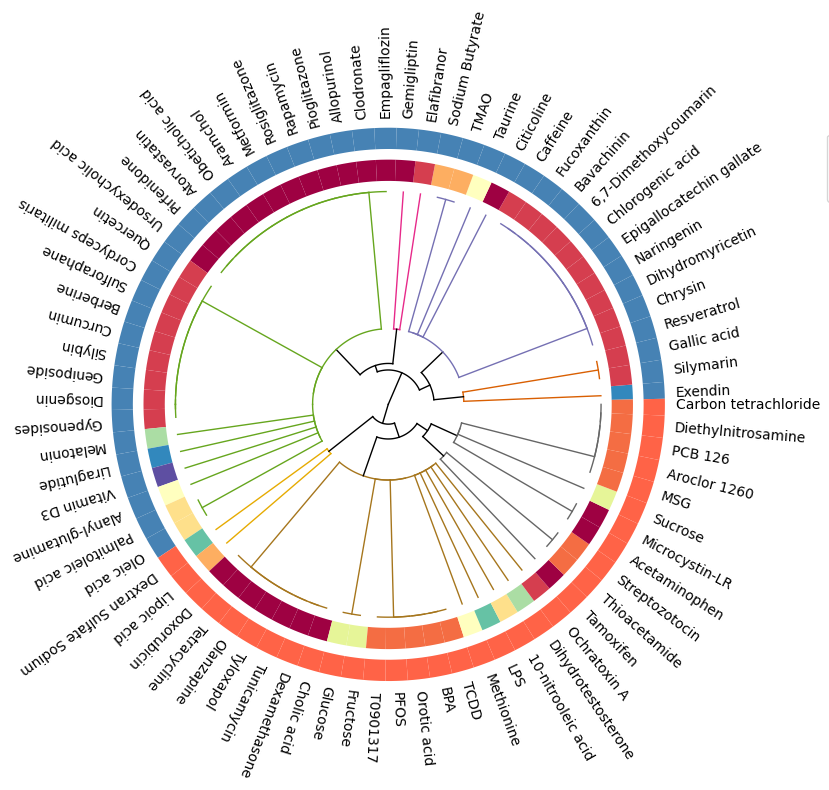

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.cm as cm
import radialtree as rt  # Assuming radialtree is the correct package for your radialTreee function

def plot_circular_dendrogram(df, class_col='CLASS', pathway_col='PATHWAY', source_col='SOURCE', chemical_col='CHEMICAL_NAME'):
    # Encode the CLASS, PATHWAY, and Source columns for clustering
    df_encoded = pd.get_dummies(df[[class_col, pathway_col, source_col]])
    Y = sch.linkage(df_encoded, method="average")
    Z2 = sch.dendrogram(
        Y,
        labels=df[chemical_col].values,
        no_plot=True,
    )

    # Prepare the figure
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_aspect(1)

    # Define specific colors for each class and source
    class_colors = {
        'Inducer'  : '#FF6347',  # Tomato red
        'Inhibitor': '#4682B4',  # Steel blue
    }
    source_colors = {
        'Drugs' : '#9e0142',
        'Natural products' : '#d53e4f',
        'Chemicals' : '#f46d43',
        'Metabolites' : '#fdae61',
        'Fatty acids' : '#fee08b',
        'Amino acids' : '#ffffbf',
        'Sugars' : '#e6f598',
        'Hormones' : '#abdda4',
        'Polysaccharides' : '#66c2a5',
        'Peptides' : '#3288bd',
        'Vitamins' : '#5e4fa2'
    }
    colors_legends= {"Classes": {"colors": ['#FF6347','#4682B4'], "labels": ['Inducer', 'Inhibitor']},
                     "Source": {"colors": list(source_colors.values()), "labels": list(source_colors.keys())}}
    # Create color arrays for leaves
    leaf_colors = [class_colors.get(cls, '#FFFF00') for cls in df[class_col]]
    leaf_source_colors = [source_colors.get(src, '#FFFF00') for src in df[source_col]]
    print(leaf_source_colors)
    # Plot the radial tree
    rt.radialTreee(Z2, ax=ax, pallete="Dark2", fontsize=10, colorlabels={"Classes": leaf_colors, "Source": leaf_source_colors}, colorlabels_legend=colors_legends)
    for line in ax.lines:
        line.set_linewidth(1)  # Adjust the line width
    plt.tight_layout()
    plt.savefig("dendrogram.png", dpi=500)
    plt.show()

# Example usage
df = pd.read_csv("dataset.csv")  # Load your data here
plot_circular_dendrogram(df)


pip list --format=freeze > requirements.txt